<img style="float: left; width: 260px;" src="images/testcloud.png">
***
# <font color="grey">    Lecture 6 - Machine Learning</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$

In this lecture we will embark on one of the most important modern applications of convex optimization: **machine learning**. The goal of machine learning is to develop methods to automatically *learn* a function

\begin{equation*}
 h\colon \mathcal{X}\to \mathcal{Y},
\end{equation*}

where $\mathcal{X}$ is a space of *inputs* or *features*, and $\mathcal{Y}$ consists of *outputs* or *responses*. The input space $\mathcal{X}$ is usually an $\R^n$, though the inputs could represent anything such as images, texts, emails, genome sequences, or networks, financial time series, or demographic data. The output could be either **quantitative** values, such as a temperature or the amount of some substance in the body, or **qualitative** or **categorical**, such as {YES, NO} or $\{0,1,2,3,4,5,6,7,8,9\}$ (for recognising spam or handwritten digits, respectively). The first type of problem is usually called **regression**, while the latter is called **classification**. Machine learning techniques underlie much of modern technology, from car electronics to online product recommendation systems and search engines.

---
## <font color="grey">Supervised Learning</font>
---

**Example** (Handwriting recognition)
Given a dataset of pixel matrices, each representing a grey-scale image, with associated \textbf{labels} telling us for each image the number it represents, the task is to use this to train a computer program to recognise new numbers. Such classification tasks are often carried out using **deep neural networks**. 

![Letter recognition](images/letters.jpg)

**Example** (Linear regression)
Recall from Lecture 1 the problem of finding a function of the form

\begin{equation*}
  Y = \beta_0+\beta_1X_1+\cdots +\beta_pX_p.
\end{equation*}

Given a set of input-output pairs $(\vct{x}_i,y_i)$, arranged in a matrix $\mtx{X}$ and a vector $\vct{y}$, we saw that we could *guess* the correct $\vct{\beta} = (\beta_0,\beta_1,\dots, \beta_p)^{\trans}$ by solving the *least-squares* optimization problem

\begin{equation*}
  \mathop{\minimize}_{\vct{\beta}} \norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2.
\end{equation*}

By now, we know how to solve this problem using gradient descent.

**Example** In text classification, the task is to decide to which of a given set of categories a given text belongs. The training data consists of a *bag of words*: this is a large sparse matrix, whose
columns represent words and the rows represent articles, with the $(i,j)$-th entry containing the number of times word $j$ is contained in text $i$. 


|           | Rooney | Boris |
|---------- |--------|-------|
| Article 1 |      5 |     0 |
| Article 2 |      1 |     7 |

For example, in the above set we would classify the first article as "Sports" and the second one as "Politics". One such training dataset is the [Reuters Corpus Volume I (RCV1)](http://www.daviddlewis.com/resources/testcollections/rcv1/), an archive of over 800,000 categorised newswire stories.

A typical binary classifier for such a problem would be a **linear classifier** of the form

\begin{equation*}
  h(\vct{x}) = \vct{w}^{\trans}\vct{x}-\tau,
\end{equation*} 

with $\vct{w}\in \R^n$ and $\tau\in \R$. Given a text, represented as a row of the dataset $\vct{x}$, it is classified into one of two classes $\{+1,-1\}$, depending on whether $h(\vct{x})>0$ or $h(\vct{x})<0$. 

Suppose we have the training data $\{\vct{x}_i,y_i\}_{1\leq i\leq m}$ and we found a candidate function $h\colon \mathcal{X}\to \mathcal{Y}$. How do we assess if this is a good fit? One usually assigns to the problem a **loss function** $\ell\colon \mathcal{Y}\times \mathcal{Y}\to \R_+$ that measures the mismatch of a prediction. One would then aim to find a function $h$ among a set of candidates that minimizes the loss when applying the function to the training data:

\begin{equation*}
  \mathop{\minimize}_{h} \ \frac{1}{m} \sum_{i=1}^m \ell(h(\vct{x}_i,y_i).
\end{equation*}

The form of the loss function depends on the problem at hand, but two typical candidates are the **square error** for regression problems,

\begin{equation*}
  \ell(h(\vct{x}),y) = (h(\vct{x})-y)^2,
\end{equation*}

and the indicator loss function

\begin{equation*}
  \mathbf{1}\{h(\vct{x})\neq y\},
\end{equation*}

where $\mathbf{1}\{A\}$ is the indication function, which takes the value $1$ if $A$ is true, and $0$ else. As this function is not continuous, in practice one often encounters the *log loss* function,

\begin{equation*}
  \ell(h(\vct{x}),y) = \log\left(1+e^{-h(\vct{x})y} \right).
\end{equation*}

Note that if $h(\vct{x})$ and $\vct{y}$ have the same sign (corresponding to a match), then the value of this function will be close to zero. 

Suppose we have a binary classification task at hand, with $\mathcal{Y}=\{-1,1\}$. We could *learn* the following function from our data:

\begin{equation*}
  h(\vct{x}) = \begin{cases}
    y_i & \text{ if } \vct{x}=\vct{x}_i,\\
    1 & \text{ otherwise.}
  \end{cases}
\end{equation*}

The **empirical misclassification risk** in for this problem is then $0$,

\begin{equation*}
  R(h) = \frac{1}{m} \sum_{i=1}^m \mathbf{1}\{h(\vct{x}_i\neq y_i\} = 0.
\end{equation*}

Nevertheless, this is not a good classifier: it will not perform very well outside of the training set. This is an example of **overfitting**: when the function is adapted too closely to the seen data. To remedy this, one often (randomly) splits the available data into a **training set** and a **test set**. The training set is used to find the function $h$, while the test set is for testing how good it is (in practise, one often adds a validation set, used to tune some parameters of the problem).

**Example** In the linear regression problem with the quadratic loss function, we end up with the minimization problem

\begin{equation*}
  \mathop{\minimize}_{\vct{\beta}} \frac{1}{n} \sum_{i=1}^n (\vct{x}_i^{\trans}\vct{\beta}-y_i)^2 =\frac{1}{n}\norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2.
\end{equation*}

This is precisely the problem encountered in Lecture 1.

**Example** In the example of classifying a text into two classes using a linear classifier, we can look at the problem

\begin{equation*}
 \mathop{\minimize}_{\vct{w}, \tau} \frac{1}{n}\sum_{i=1}^m \mathbf{1}\{\vct{w}^{\trans}\vct{x}_i-\tau \neq y_i\}.
\end{equation*}

Since this function is not smooth or even continuous, we can work with the log-loss function described above,

\begin{equation*}
\mathop{\minimize}_{\vct{w}, \tau} \frac{1}{n} \sum_{i=1}^m \ell(\vct{w}^{\trans}\vct{x}_i-\tau, y_i).
\end{equation*}

This function can, in principle, be minimized using gradient descent or Newton's method. 

In the following example, we use this classifier to separate an artificial data set of 20 points. 10 points are generated as normal (Gaussian) distributed vectors in $\R^2$, with mean $(2,2)^{\trans}$ and variance $0.25$, while the other 10 points are generated with mean $(0,0)^{\trans}$ and the same variance.

In [1]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
import matplotlib.pyplot as plt

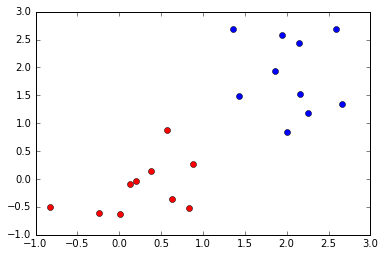

In [2]:
X = np.zeros((2,20))
for i in range(10):
    X[:,i] = np.array([2,2]) + 0.5*rnd.randn(2)
for i in range(10):
    X[:,10+i] = np.array([0,0]) + 0.5*rnd.randn(2)
    
% matplotlib inline
plt.plot(X[0,0:10], X[1,0:10], 'o')
plt.plot(X[0,10:], X[1,10:], 'o', color='red')
plt.show()

We next minimize the {\em log-loss function},

\begin{equation*}
  F(\vct{w}) = \sum_{i=1}^{20} \log(1+e^{-y_i (\vct{w}^{\trans}\vct{x}_i-\tau)}),
\end{equation*}

where the $\vct{x}_i\in \R^2$ are the points, and the $y_i\in \{-1,1\}$ classify these as either red or blue. As minimization algorithm we choose gradient descent with backtracking, though any other reasonable algorithm would do.


In [3]:
def graddesc_bt(f, df, x0, tol, maxiter=100, rho=0.5, c=0.1):
    """
    Gradient descent with backtracking
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        p = -df(x[:,i])
        # Start backtracking
        alpha = 1
        xnew = x[:,i] + alpha*p
        while (f(xnew) >= f(x[:,i]) + alpha*c*np.dot(p, df(x[:,i]))):
            alpha = alpha*rho
            xnew = x[:,i] + alpha*p
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

In [4]:
y = np.concatenate((-np.ones(10),np.ones(10)))
X = np.concatenate((X, np.ones((1,20))), axis=0)

def f(w):
    return np.sum(np.log(1+np.exp(-y*(np.dot(w,X)))))

def df(w):
    return np.array([-np.sum(y*X[0,:]*np.exp(-y*np.dot(w,X))/
     				 (1+np.exp(-y*np.dot(w,X)))), 
                     -np.sum(y*X[1,:]*np.exp(-y*np.dot(w,X))/
                     (1+np.exp(-y*np.dot(w,X)))),
                     -np.sum(y*X[2,:]*np.exp(-y*np.dot(w,X))/
                     (1+np.exp(-y*np.dot(w,X))))])

W = graddesc_bt(f, df, np.array([1.,1.,1.]), 1.e-8)         

The algorithm gives as output a vector $\vct{w}=(w_1,w_2,w_3)\in \R^3$, so that the line separating the two sets of points is given by

\begin{equation*}
 w_1 x_1 + w_2 x_2 + w_3 = 0.
\end{equation*}

Rearranging this as a function $\ell(x_1) = x_2 = -(w_1x_1+w_3)/w_2$ and plotting the line into the pointcloud, we get the following graph.

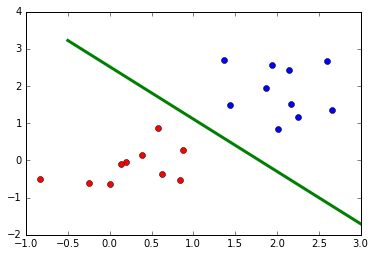

In [5]:
def l(x):
    return (-W[0,-1]*x-W[2,-1])/W[1,-1]
    
xx = np.linspace(-0.5,3,100)
yy = l(xx)
plt.plot(X[0,0:10], X[1,0:10], 'o')
plt.plot(X[0,10:], X[1,10:], 'o', color='red')
plt.plot(xx,yy,linewidth=3)
plt.show()

Of course, we would like to know how our classifier does with a {\em test set} generated according to the same distribution. The result is seen the following plot.

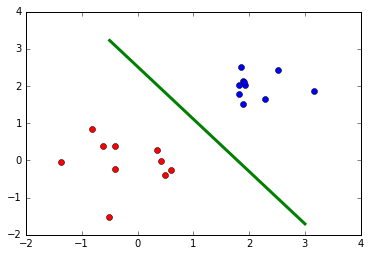

In [7]:
# Generate test data
T = np.zeros((2,20))
for i in range(10):
    T[:,i] = np.array([2,2]) + 0.5*rnd.randn(2)
for i in range(10):
    T[:,10+i] = np.array([0,0]) + 0.5*rnd.randn(2)
    
plt.plot(T[0,0:10], T[1,0:10], 'o')
plt.plot(T[0,10:], T[1,10:], 'o', color='red')
plt.plot(xx,yy,linewidth=3)
plt.show()

The given example is unproblematic, since the two sets of points are generated in a way that makes it unlikely that they can't be separated using a linear classifier. With real data, the situation may not be as favourable.

It is also interesting to see how fast the objective function (the {\em empirical risk}) approaches the minimum. While the value of the objective function decreases very quickly at the beginning, the decrease slows down dramatically and the algorithm does not reach the desired accuracy within the limit we set for the number of iterations. Now, however, that for the classification task we are interested, we don't need the best possible precision! In fact, the noise in the data makes too much precision meaningless, and we can safely use the result obtained after 100 iterations. Other algorithms and approaches may perform better for this problem.

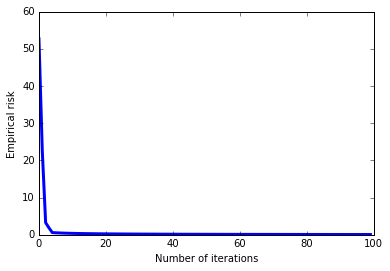

In [8]:
risk = np.zeros(W.shape[1])
for i in range(W.shape[1]):
    risk[i] = f(W[:,i])
    
plt.plot(range(W.shape[1]), risk, linewidth=3)
plt.xlabel('Number of iterations')
plt.ylabel('Empirical risk')
plt.show()

We have seen how a machine learning problem can be turned into an optimization problem. Unfortunately, when the amount of data is large, computing gradients and Hessians of the resulting functions can be very expensive. Suppose the function $h$ depends on parameters $\vct{w}$ which we want to optimize over, $h=h(\vct{x}; \vct{w})$, and denote the composition of the loss function $\ell$ with $h$ on the data $\vct{x}_i$ by

\begin{equation*}
  f_i(\vct{w}) := \ell(h(\vct{x}_i; \vct{w}),y_i).
\end{equation*}

We can then write our optimization problem as

\begin{equation*}
  \mathop{\minimize}_{\vct{w}} F(\vct{w}), \quad F(\vct{w}) = \frac{1}{m} \sum_{i=1}^m f_i(\vct{w}).
\end{equation*}

The gradient is then

\begin{equation*}
  \nabla F(\vct{w}) = \frac{1}{m} \sum_{i=1}^n \nabla f_i(\vct{w}).
\end{equation*}

For large datasets (for example, $m>10^6$ is not uncommon), computing all the gradients in each step is highly ineffective.

An old algorithm that has recently been revived in light of big data is **Stochastic Gradient Descent** (**SGD**). The idea is to compute, at each step, only the gradient of *one* (or sometimes a few) of the summands of the loss function:

\begin{equation*}
  \vct{w}_{k+1} = \vct{w}_k-\alpha_k \nabla f_{i_k}(\vct{w}_k),
\end{equation*}

where the index $i_k$ is *chosen at random* from $\{1,\dots,m\}$ at each step. 

Each step of this algorithm is clearly faster than gradient descent, but does it even work? It turns out that this algorithm converges quickly and that it is surprisingly effective on large datasets.
